In [3]:
import pandas as pd

# Define file path (update with the actual path where your CSV is stored)
file_path = "/Users/yijun.cheng/Downloads/StudentPerformanceFactors.csv"

# Load data into a Pandas DataFrame
df = pd.read_csv(file_path, header=None)

# Show the first 5 rows of the data
print(df.head())

   0   1       2       3    4   5   6       7    8   9       10      11  \
0  23  84     Low    High   No   7  73     Low  Yes   0     Low  Medium   
1  19  64     Low  Medium   No   8  59     Low  Yes   2  Medium  Medium   
2  24  98  Medium  Medium  Yes   7  91  Medium  Yes   2  Medium  Medium   
3  29  89     Low  Medium  Yes   8  98  Medium  Yes   1  Medium  Medium   
4  19  92  Medium  Medium  Yes   6  65  Medium  Yes   3  Medium    High   

       12        13  14  15            16        17      18  19  
0  Public  Positive   3  No   High School      Near    Male  67  
1  Public  Negative   4  No       College  Moderate  Female  61  
2  Public   Neutral   4  No  Postgraduate      Near    Male  74  
3  Public  Negative   4  No   High School  Moderate    Male  71  
4  Public   Neutral   4  No       College      Near  Female  70  


In [4]:
# Define column names based on the dataset documentation
column_names = ["Hours_Studied", "Attendance", "Parental_Involvement", "Access_to_Resources",
                     "Extracurricular_Activities", "Sleep_Hours", "Previous_Scores", "Motivation_Level",
                     "Internet_Access", "Tutoring_Sessions", "Family_Income", "Teacher_Quality",
                     "School_Type", "Peer_Influence", "Physical_Activity", "Learning_Disabilities",
                     "Parental_Education_Level", "Distance_from_Home", "Gender", "Exam_Score"]

# Assign these column names to the DataFrame
df.columns = column_names

# Display the updated DataFrame
print(df.head())

   Hours_Studied  Attendance Parental_Involvement Access_to_Resources  \
0             23          84                  Low                High   
1             19          64                  Low              Medium   
2             24          98               Medium              Medium   
3             29          89                  Low              Medium   
4             19          92               Medium              Medium   

  Extracurricular_Activities  Sleep_Hours  Previous_Scores Motivation_Level  \
0                         No            7               73              Low   
1                         No            8               59              Low   
2                        Yes            7               91           Medium   
3                        Yes            8               98           Medium   
4                        Yes            6               65           Medium   

  Internet_Access  Tutoring_Sessions Family_Income Teacher_Quality  \
0             Ye

In [5]:
# Check for missing values in the DataFrame
missing_values = df.isnull().sum()
print(missing_values)

Hours_Studied                  0
Attendance                     0
Parental_Involvement           0
Access_to_Resources            0
Extracurricular_Activities     0
Sleep_Hours                    0
Previous_Scores                0
Motivation_Level               0
Internet_Access                0
Tutoring_Sessions              0
Family_Income                  0
Teacher_Quality               78
School_Type                    0
Peer_Influence                 0
Physical_Activity              0
Learning_Disabilities          0
Parental_Education_Level      90
Distance_from_Home            67
Gender                         0
Exam_Score                     0
dtype: int64


In [18]:
# Alternatively, drop rows with missing values
df_cleaned = df.dropna()

print(df_cleaned.head())

   Hours_Studied  Attendance Parental_Involvement Access_to_Resources  \
0             23          84                  Low                High   
1             19          64                  Low              Medium   
2             24          98               Medium              Medium   
3             29          89                  Low              Medium   
4             19          92               Medium              Medium   

  Extracurricular_Activities  Sleep_Hours  Previous_Scores Motivation_Level  \
0                         No            7               73              Low   
1                         No            8               59              Low   
2                        Yes            7               91           Medium   
3                        Yes            8               98           Medium   
4                        Yes            6               65           Medium   

  Internet_Access  Tutoring_Sessions Family_Income Teacher_Quality  \
0             Ye

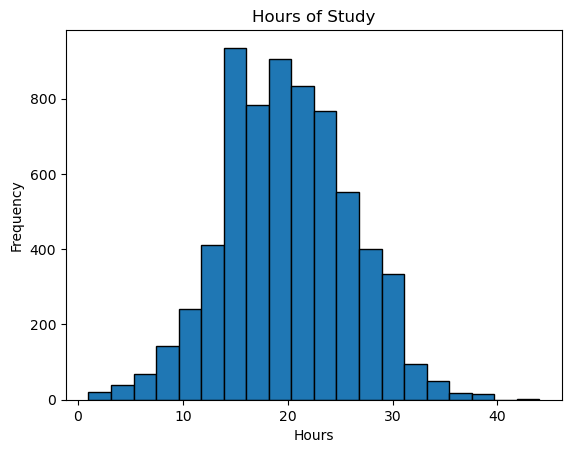

In [20]:
import matplotlib.pyplot as plt

# Plot histogram of car prices
plt.hist(df['Hours_Studied'], bins=20, edgecolor='black')
plt.title('Hours of Study')
plt.xlabel('Hours')
plt.ylabel('Frequency')
plt.show()

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Define predictors and target variable
X = df[['Hours_Studied', 'Attendance', 'Previous_Scores']]  # Example features
y = df['Exam_Score']

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_test)


      Hours_Studied  Attendance  Previous_Scores
743              20          71               87
5551             22          71               98
3442             21          91               53
6571             12          91               81
4204             21          63               95
...             ...         ...              ...
4709             20          78               85
3664             27          90               92
5231             23          72               61
1773             21          76               50
5782             23          87               96

[1322 rows x 3 columns]


In [26]:
# Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict prices on the test set
predictions = model.predict(X_test)
print(predictions)

[66.02422558 67.12132203 68.68064739 ... 65.85179818 65.55123954
 70.50004389]
